In [1]:
include("intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra
using RSGraphics
using GraphPlot
using Plots
using HNProcess
using DataRefine
using PartitioningData
using Random

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [67]:
N = 64
s = Int(sqrt(N))

# All ones
i1 = reshape(ones(N), s, s)

# Creates half and half
i2 = copy(i1)
i2[1 : Int(N/2)] .= 1
i2[Int(N/2)+1 : N] .= -1

# Random Orthogonal
i3 = copy(i2)

# Randomly chooses positions to flip, r1 for first half, r2 for second
r1 = shuffle(1 : Int(N/2))[1:Int(N/4)]
r2 = shuffle(Int(N/2)+1 : N)[1:Int(N/4)]

i3[r1] .= -1
i3[r2] .= 1


64-element view(::Vector{Float64}, [222, 243, 256, 196, 203, 162, 210, 231, 147, 221  …  187, 177, 156, 153, 195, 182, 166, 237, 175, 136]) with eltype Float64:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [68]:
function three_random_orthogonal_image(N::Int) ::Vector{Matrix{Int64}}
    s = Int(sqrt(N))
    
    # All ones
    i1 = reshape(ones(N), s, s)
    
    # Creates half and half
    i2 = copy(i1)
    i2[1 : Int(N/2)] .= 1
    i2[Int(N/2)+1 : N] .= -1
    
    # Random Orthogonal
    i3 = copy(i2)
    
    # Randomly chooses positions to flip, r1 for first half, r2 for second
    r1 = shuffle(1 : Int(N/2))[1:Int(N/4)]
    r2 = shuffle(Int(N/2)+1 : N)[1:Int(N/4)]
    
    i3[r1] .= -1
    i3[r2] .= 1
    return [i1, i2, i3]
end


random_orthogonal_images (generic function with 2 methods)

In [80]:
k = random_orthogonal_images(64)

println(dot(k[1],k[2]))
println(dot(k[1],k[3]))
println(dot(k[2],k[3]))

0
0
0


In [70]:
sim_time = 4
steps = 3000
parameters = Dict{String, Any}(
    "images" => random_orthogonal_images(64),
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))

3


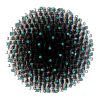

In [71]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
 gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [72]:
println(is_connected(graph))
println(maximum(weights(graph)))
println(minimum(weights(graph)))
@show sum(abs.(weights(graph)))

true
3.0
-1.0
sum(abs.(weights(graph))) = 5952.0


5952.0

In [73]:
#Running
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "16by16","len16_t3")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │     -1 │      1 │      1 │      1 │      1 │      1 │
│      1 │     -1 │      1 │      1 │      1 │      1 │     -1 │      1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │     -1 │      1 │      1 │     -1 │      1 │     -1 │      1 │
│      1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │      1 │
│      1 │     -1 │     -1 │      1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │      1 │     -1 │     -1 │      1 │     -1 │      1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 16by16_1_len16_t3.dat is generated


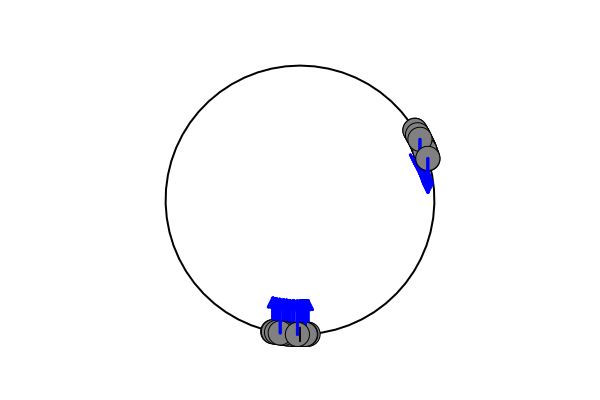

In [74]:
show_state(res[1][1],res[1][2])

In [75]:
sol_finder(res[1], parameters)

FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │     -1 │      1 │      1 │      1 │      1 │      1 │
│      1 │     -1 │      1 │      1 │      1 │      1 │     -1 │      1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │     -1 │      1 │      1 │     -1 │      1 │     -1 │      1 │
│      1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │      1 │
│      1 │     -1 │     -1 │      1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │      1 │     -1 │     -1 │      1 │     -1 │      1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3

2-element Vector{Any}:
 (Int8[1, 1, 1, -1, 1, 1, 1, -1, -1, -1  …  -1, 1, 1, 1, -1, -1, 1, 1, -1, -1], [-0.9349086936249078, -0.9325655653527969, -1.0, -0.33577317393290906, -0.9317938559725238, -0.917158074167125, -0.9584583025476645, -0.3238685948977216, -0.2915301808370041, -0.2760191958103011  …  -0.2736619288939153, -0.9906719870545277, -0.9739248253140631, -0.9225765473624681, -0.2936090909660123, -0.31421974463781455, -0.9819220935542954, -0.9409943383954111, -0.2858165567958695, -0.33470983168517643])
 (Int8[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0.40086448030800104, 0.4032076085801122, 0.33577317393290906, -1.0, 0.4039793179603852, 0.41861509976578404, 0.37731487138524433, -0.9880954209648127, -0.9557570069040953, -0.9402460218773923  …  -0.9378887549610064, 0.3451011868783813, 0.36184834861884574, 0.413196626570441, -0.9578359170331034, -0.9784465707049055, 0.3538510803786137, 0.39477883553749793, -0.9500433828629604, -0.998936657

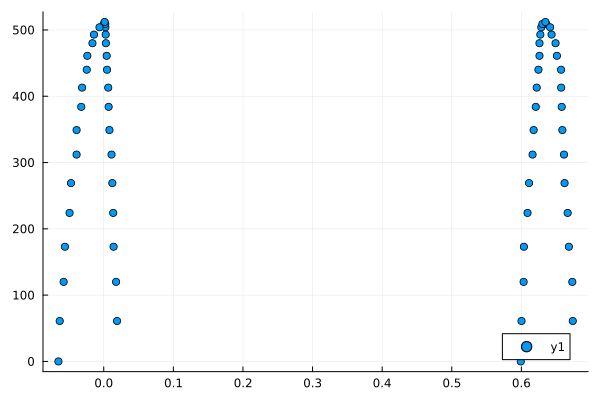

In [77]:
HN_cut_plotter(parameters, res[1])

In [81]:
conv = 0
twos = 0 
others = 0
elp = @elapsed begin
    for i in 1:100
        parameters["images"] = random_orthogonal_images(64)
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv += 1
        end
        if sol_count == 2
            twos += 1 
        end
        if sol_count > 2
            others += 1 
        end
    end
end
println("Number of convs: $(conv)")
println("Number of twos: $(twos)")
println("Number of more than two sols: $(others)")
println("took $elp seconds")

Number of convs: 100
Number of twos: 94
Number of more than two sols: 0
took 10.782416792 seconds
